In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [107]:
# Load the dataset
data = pd.read_csv(r'D:\ALY 6020\Week 1\Project 1\adult-all.csv')
df = data

In [108]:
# Display the first few rows
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [109]:
# Rename columns for consistency based on provided details
data.columns = ['age', 'workclass', 'inlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Salary']

In [110]:
# Display the first few rows
df.head()

,age,workclass,inlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [111]:
# Display initial information
print("Initial data info:")
print(df.info())

Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   inlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education-num   48841 non-null  int64 
 5   marital-status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital-gain    48841 non-null  int64 
 11  capital-loss    48841 non-null  int64 
 12  hours-per-week  48841 non-null  int64 
 13  native-country  48841 non-null  object
 14  Salary          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [112]:
# Drop the `inlwgt` column as it is to be ignored
data.drop(columns=['inlwgt'], inplace=True)

In [113]:
# Replace '?' with NaN for missing value handling
data.replace('?', pd.NA, inplace=True)

In [114]:
# Replace '?' with NaN for missing value handling
data.replace('?', pd.NA, inplace=True)

In [115]:
# Impute missing values for categorical variables with the most frequent value
for column in data.select_dtypes(include='object').columns:
    # Replace pandas NA with a placeholder (optional, but can help prevent issues)
    data[column] = data[column].fillna('')
    # Create an imputer instance
    imputer = SimpleImputer(strategy='most_frequent')
    # Fit the imputer and transform the data, ensuring it remains a DataFrame
    data[column] = imputer.fit_transform(data[[column]]).ravel()  # .ravel() converts it to a 1D array

In [116]:
# Check for remaining missing values
missing_values = data.isnull().sum()
print(missing_values)

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64


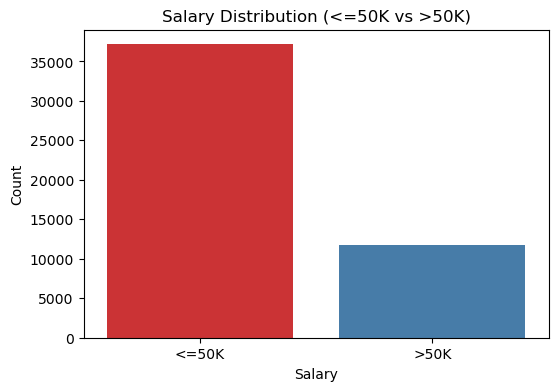

In [117]:
# Step 1: Visualize the distribution of the target variable (Salary)
plt.figure(figsize=(6, 4))
sns.countplot(x='Salary', data=data, palette='Set1')
plt.title('Salary Distribution (<=50K vs >50K)')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

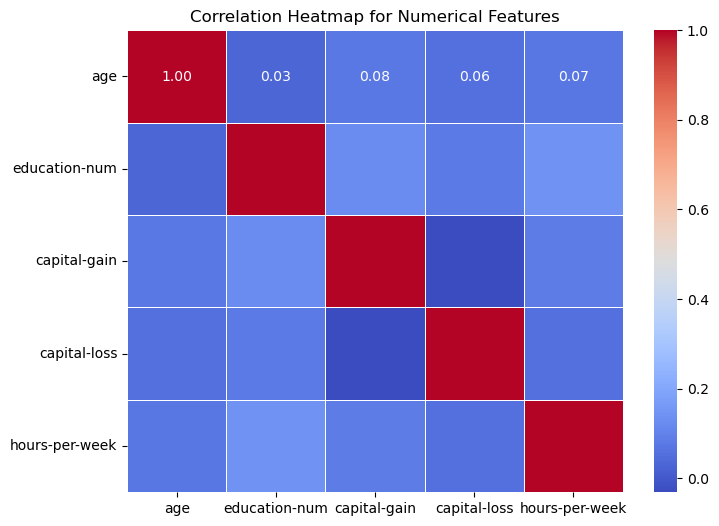

In [118]:
# Step 7: Show correlation heatmap between numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = data[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

Best k value: 19
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11166
           1       0.71      0.56      0.63      3487

    accuracy                           0.84     14653
   macro avg       0.79      0.75      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Model accuracy: 0.8410564389544803


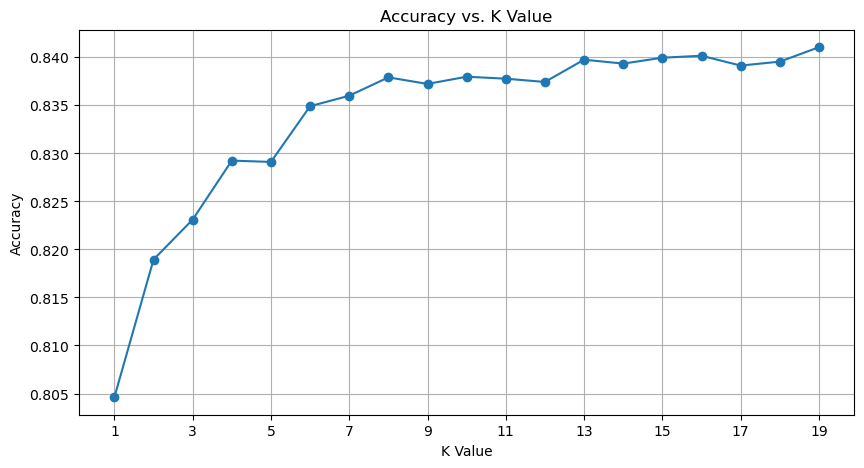

In [119]:
# Encode categorical features using Label Encoding for simplicity
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    if column != 'Salary':  # Exclude target column
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Map 'Salary' column to binary: '<=50K' -> 0, '>50K' -> 1
data['Salary'] = data['Salary'].map({'<=50K': 0, '>50K': 1})

# Standardize numerical columns
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# Ensure these columns exist in the DataFrame
missing_columns = [col for col in numerical_columns if col not in data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")

# Proceed with scaling if all columns exist
if not missing_columns:
    scaler = StandardScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # Split the data into training and testing sets
    X = data.drop('Salary', axis=1)
    y = data['Salary']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Determine the best k value by evaluating accuracy for different k values
    accuracies = {}
    for k in range(1, 20):  # Trying odd values for k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracies[k] = accuracy_score(y_test, y_pred)

    # Select the best k based on highest accuracy
    best_k = max(accuracies, key=accuracies.get)
    print(f"Best k value: {best_k}")

    # Train final model with the optimal k
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Print classification report and model accuracy
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Model accuracy: {accuracy_score(y_test, y_pred)}")

    # Plot Accuracy vs. K Value
    plt.figure(figsize=(10, 5))
    plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
    plt.title('Accuracy vs. K Value')
    plt.xlabel('K Value')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, 20, 2))
    plt.grid()
    plt.show()